# BL40A2030 Wireless Communication Networks

## Week 2 - Assignment

### Author: [Niki Malmsten]

### Part I: Theory (40%)

**1. Explain with your own words what is a random variable and a random process.**

A random variable is a numerical value that is produced to represent the random outcomes a situation has. For example rolling a dice
produces a random variable, that has value from 1 to 6.

A random process is pretty much a process that changes with time, meaning it's time dependent.

**2. Explain with your own words and give an example of the following kind of random processes:**

- (a) Memoryless

A process that isn't affected by history or previous events in any way. For example the dice roll.

- (b) Markov
 
A Markov process is a process that is only dependent on the last previous state. For example animal population could be simulated with markov process.

- (c) History-dependent

History-dependent process is dependent on all the previous states. An example of this kind of process could be forming a sentence, where the previous words that are chosen effect the future choices if the sentence is to be coherrent.

### Part II: Jupyter NB experiments (60%)

**The LUT restaurant works from 9 to 14. Based on the data, there were identified three different periods in relation to arrival of people to have lunch. Answer the following 3 questions.** 

*Hint:* Careful with the time scales given in the question and the one implemented in the tutorial.

**3. The arrivals follow a Poisson process with different arrival rates (see below). Simulate it, plot the historgram from the simulated results and compare with the analytical formulation. These are the parameters.**

- (a) For two hours between 9 and 11, the arrival rate is 10 students per 10 minutes.
- (b) For two hours between 11 and 13, the arrival rate is 30 students per 10 minutes.
- (c) For two hours between 13 and 15, the arrival rate is 20 students per 10 minutes.

**NOTE: Compute using rates in students per minute.**

**4. Using the code from the tutorial, simulate these three scenarios (one scenario per cell, do not combine the three scenarios in the same code). In this case, the restaurant put more works so the service rate varies as follows.**

- (a) For two hours between 9 and 11, the arrival rate is 10 students per 10 minutes. Service rate is 10 students per 10 minutes.
- (b) For two hours between 11 and 13, the arrival rate is 30 students per 10 minutes. Service rate is 35 students per 10 minutes.
- (c) For two hours between 13 and 15, the arrival rate is 20 students per 10 minutes. Serice rate is 19 students per 10 minutes.

**NOTE 1: Compute using rates in students per hour as input of the code.**

**NOTE 2: Simulation time is 2 hours.**

**NOTE 3: The analytical formulation only works when the queue is stable, i.e. arrival rates lower than service rates**

**5. Discussions about the results.**
- What is the impact of a simulation time of 2 hours?

The simulation time tells how long in to the future the simulation predicts. So with a higher simulation time, the results predict more or less to the future. So longer simulation time can predict how the line could act in the future. The turn side of longer simulation is that the chance of anomaly or the simulation not being accurate shows.

- In the simulations, the 3 periods were also considered independent, i.e. the initial states of the queues were always considered 0. What is the impact of this assumption? (No need to simulate, just arguments)

I think it is a good assumption in most cases. It is good when the arrival / serve ratio is as high or higher than 1 and it is good when the arrival rates change from lower to higher, but when going from higher rate to lower one, there should be expected some queue. 

- Would be this a sound model? Why?

I think it's an okay model, it has a lot of variance, which might not be as realistic in real life. In real life I think there are very specific time windows when people arrive that can be expected that this model doesen't take into account and it doesen't take into account some special days or peoples reaction to seeing a queue. But as a general model I think it works.

**Challenge (not to be graded). Simulate a more realistic queue system considering that the three periods are sequencial and that the last period only ends after the last service is complete. When the restaurant is closed?**

In [1]:
import numpy as np 
import scipy.stats as ss
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
import queue
import copy 

In [2]:
[x for x in range(11)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

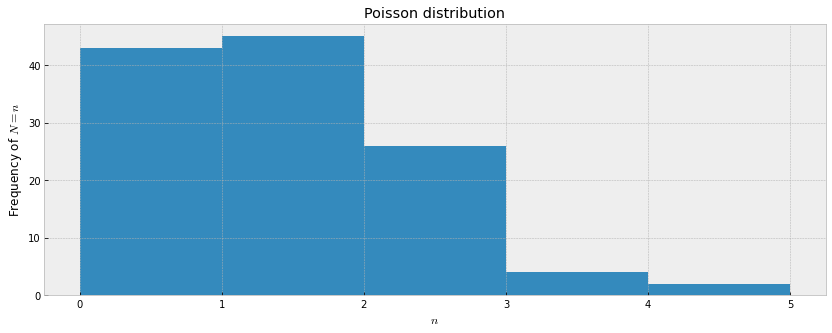

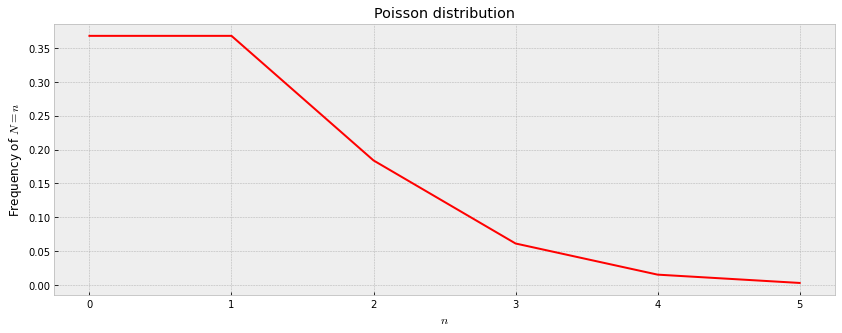

In [3]:
mean=1
size = 2 * 60
prob = []
y = [x for x in range(6)]

samples_mean = np.random.poisson(mean, size)
n_bins = np.max(samples_mean)
plt.figure(figsize=(14,5))
plt.hist(samples_mean,n_bins)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

for i in range(6):
    k = i
    prob.append(mean ** k * np.e ** -mean / math.factorial(k)) # Making an array of propabilities by using the analytical formula
plt.figure(figsize=(14,5))
plt.plot(y, prob, 'r') # Plotting the the propabilities from the analytical formula
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

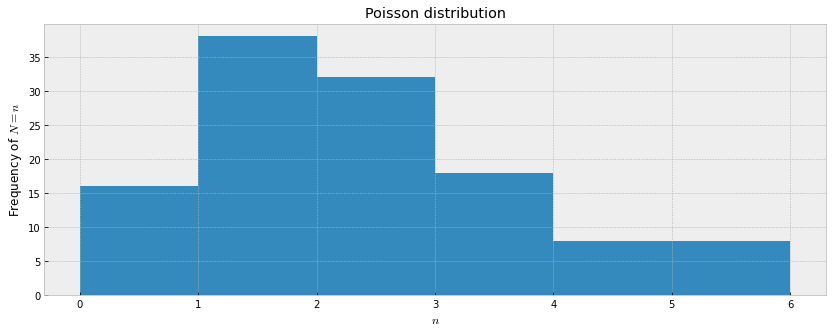

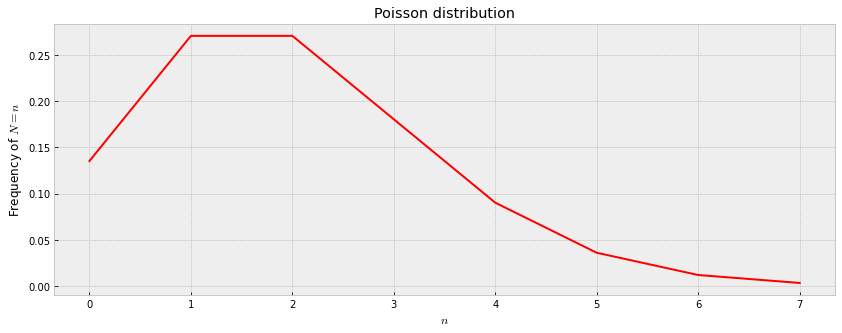

In [4]:
mean=2
size = 2 * 60
samples_mean = np.random.poisson(mean, size)
n_bins = np.max(samples_mean)
plt.figure(figsize=(14,5))
plt.hist(samples_mean,n_bins)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

L = 2
prob = []
y = [x for x in range(8)]
for i in range(8):
    k = i
    prob.append(L ** k * np.e ** -L / math.factorial(k)) 
plt.figure(figsize=(14,5))
plt.plot(y, prob, 'r')
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

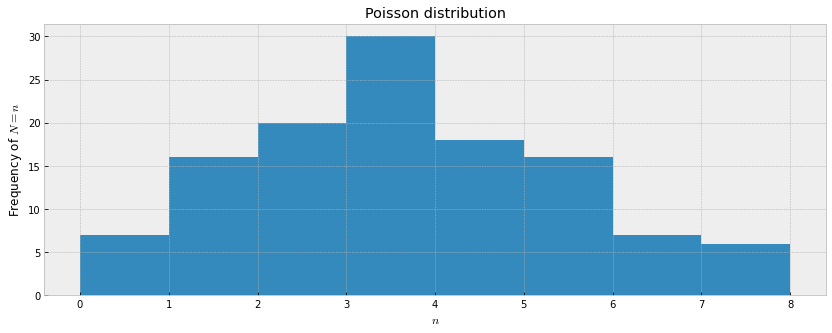

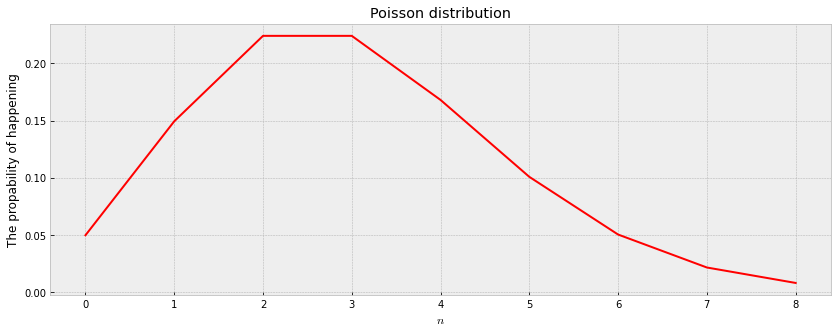

In [5]:
mean=3
size = 2 * 60
samples_mean = np.random.poisson(mean, size)
n_bins = np.max(samples_mean)
plt.figure(figsize=(14,5))
plt.hist(samples_mean,n_bins)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

L = 3
prob = []
y = [x for x in range(9)]
for i in range(9):
    k = i
    prob.append(L ** k * np.e ** -L / math.factorial(k))
plt.figure(figsize=(14,5))
plt.plot(y, prob, 'r')
plt.xlabel('$n$')
plt.ylabel('The propability of happening')
plt.title('Poisson distribution')
plt.show()

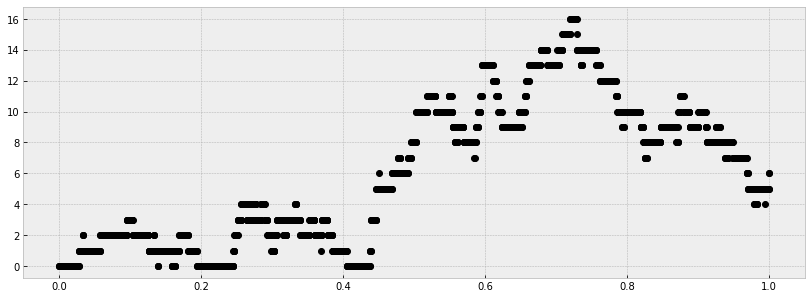

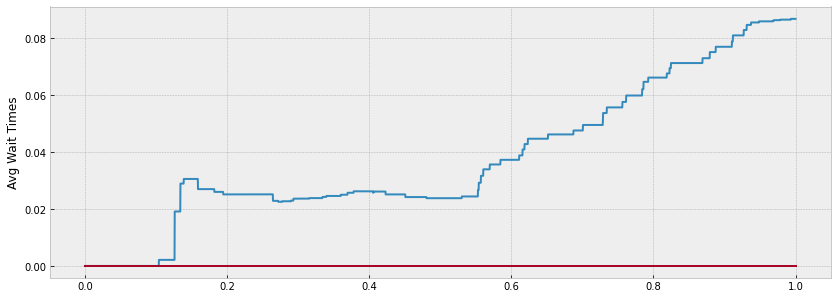

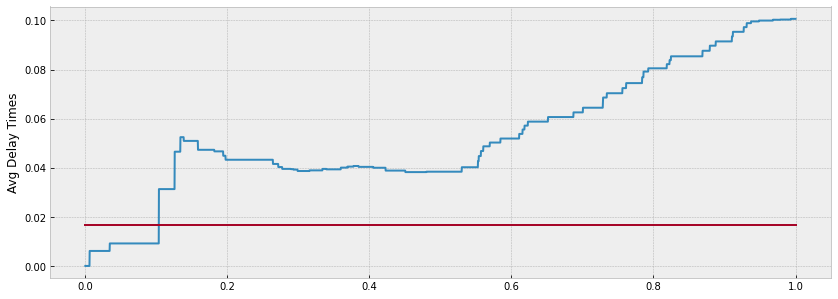

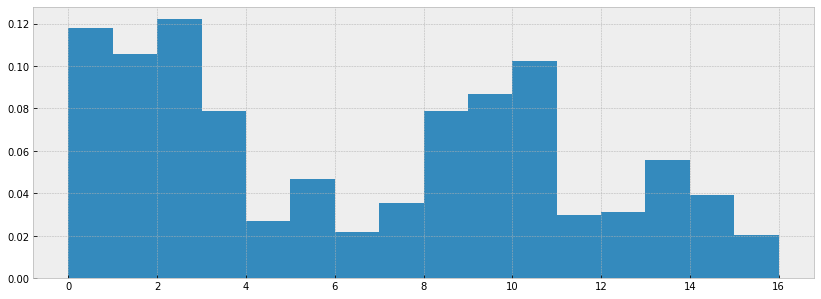

Idle ratio: 0.07083333333333333
Empty queue probability: 0.0
Wait time in queue 0.0
Delay time in system 0.016666666666666666


In [33]:
# Input Parameters -- Long one
total_time = 1 #hours
IAT_rate = 10*6 #elements arriving/hour
ST_rate = 10*6  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1)*ST_rate) - 1/ST_rate
WT = 1/((1)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
#plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)

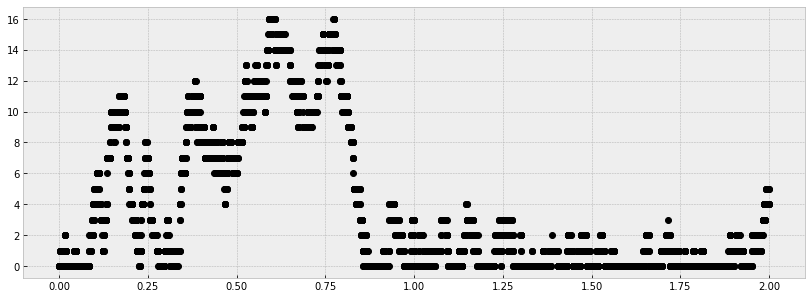

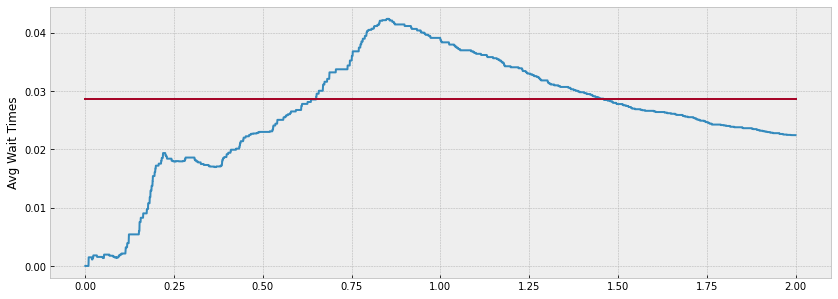

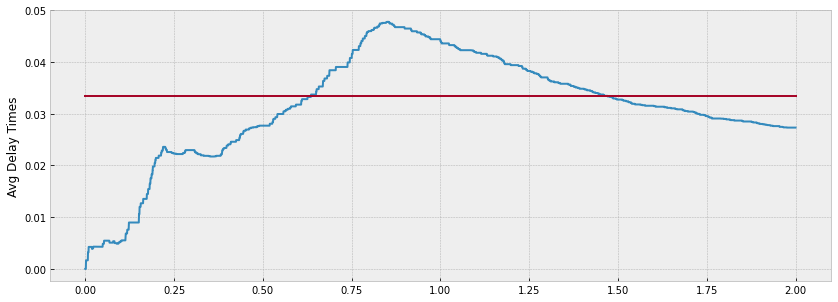

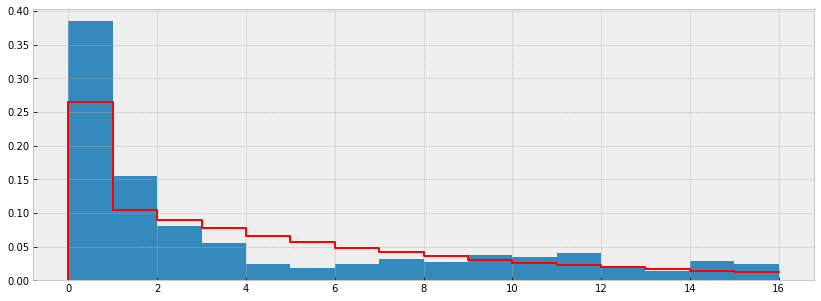

Idle ratio: 0.22875
Empty queue probability: 0.1428571428571429
Wait time in queue 0.028571428571428557
Delay time in system 0.03333333333333332


In [26]:
# Input Parameters -- Long one
total_time = 2 #hours
IAT_rate = 30*6 #elements arriving/hour
ST_rate = 35*6  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)

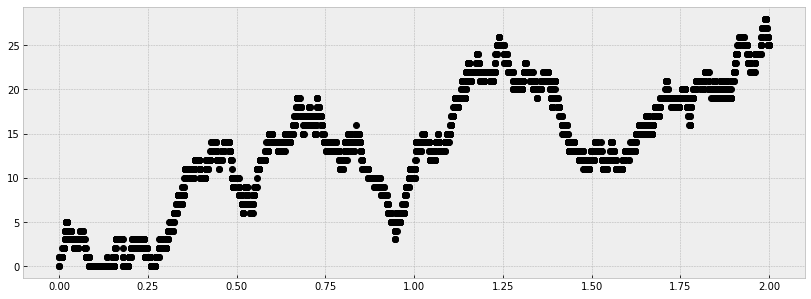

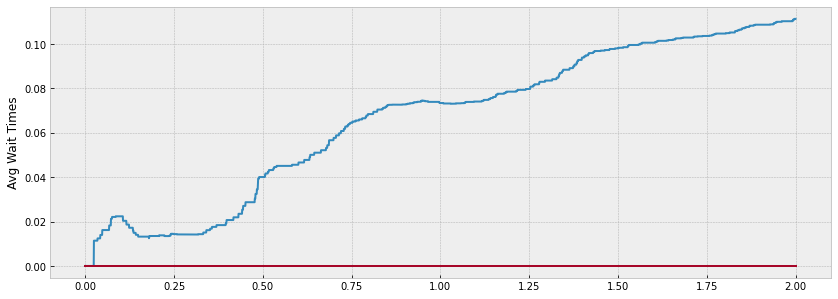

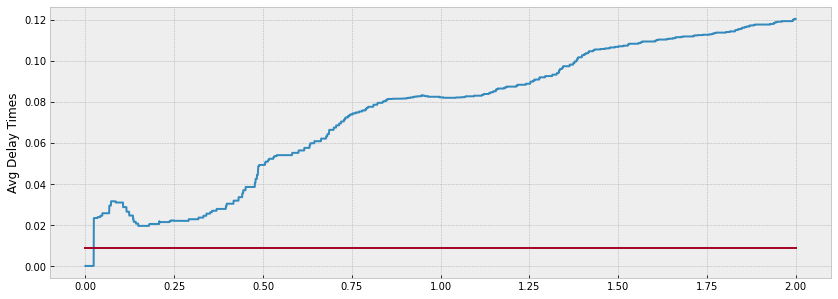

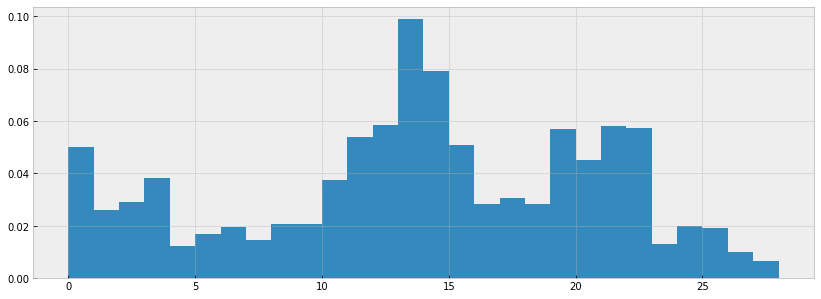

Idle ratio: 0.020694444444444446
Empty queue probability: -0.05263157894736836
Wait time in queue 0.0
Delay time in system 0.008771929824561403


In [30]:
# Input Parameters -- Long one
total_time = 2 #hours
IAT_rate = 20*6 #elements arriving/hour
ST_rate = 19*6  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1)*ST_rate) - 1/ST_rate
WT = 1/((1)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
#plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)